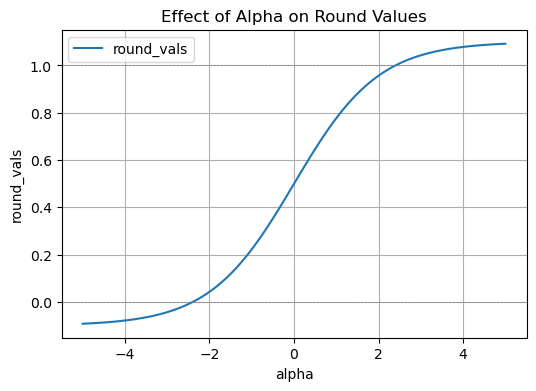

In [2]:
import torch
import matplotlib.pyplot as plt

# Define sigmoid-based rounding function
def compute_round_vals(alpha, gamma=-0.1, zeta=1.1):
    sigmoid_alpha = torch.sigmoid(alpha)  # Compute sigmoid
    round_vals = sigmoid_alpha * (zeta - gamma) + gamma  # Scale & shift
    return round_vals

# Generate alpha values from -5 to 5
alpha_values = torch.linspace(-5, 5, 100)
round_val_outputs = compute_round_vals(alpha_values)

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(alpha_values.numpy(), round_val_outputs.numpy(), label="round_vals")
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("alpha")
plt.ylabel("round_vals")
plt.title("Effect of Alpha on Round Values")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
round_val_outputs.max(), round_val_outputs.min()

(tensor(1.0920), tensor(-0.0920))

In [23]:
b =20

In [24]:
(1 - ((round_val_outputs - .5).abs() * 2).pow(b)).sum()

tensor(-677.7820)

In [28]:
1-(round_val_outputs - .5).abs()*2

tensor([-0.1839, -0.1822, -0.1804, -0.1783, -0.1760, -0.1735, -0.1707, -0.1676,
        -0.1643, -0.1605, -0.1564, -0.1519, -0.1469, -0.1413, -0.1353, -0.1286,
        -0.1213, -0.1132, -0.1043, -0.0946, -0.0840, -0.0723, -0.0595, -0.0455,
        -0.0303, -0.0136,  0.0045,  0.0242,  0.0456,  0.0687,  0.0938,  0.1209,
         0.1500,  0.1813,  0.2148,  0.2506,  0.2888,  0.3293,  0.3721,  0.4173,
         0.4647,  0.5143,  0.5660,  0.6196,  0.6750,  0.7319,  0.7901,  0.8493,
         0.9093,  0.9697,  0.9697,  0.9093,  0.8493,  0.7901,  0.7319,  0.6750,
         0.6196,  0.5660,  0.5143,  0.4647,  0.4173,  0.3721,  0.3293,  0.2888,
         0.2506,  0.2148,  0.1813,  0.1500,  0.1209,  0.0938,  0.0687,  0.0456,
         0.0242,  0.0045, -0.0136, -0.0303, -0.0455, -0.0595, -0.0723, -0.0840,
        -0.0946, -0.1043, -0.1132, -0.1213, -0.1286, -0.1353, -0.1413, -0.1469,
        -0.1519, -0.1564, -0.1605, -0.1643, -0.1676, -0.1707, -0.1735, -0.1760,
        -0.1783, -0.1804, -0.1822, -0.18

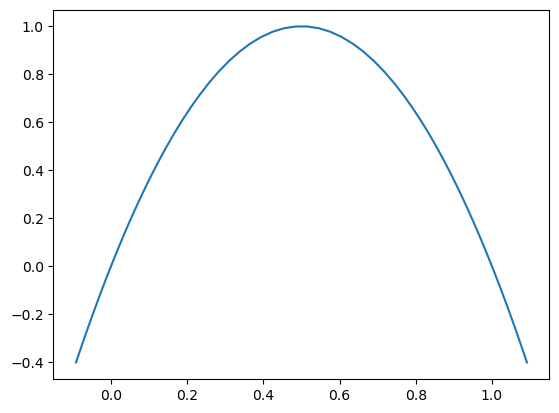

In [20]:
plt.plot(round_val_outputs, (1 - ((round_val_outputs - .5).abs() * 2).pow(b)))

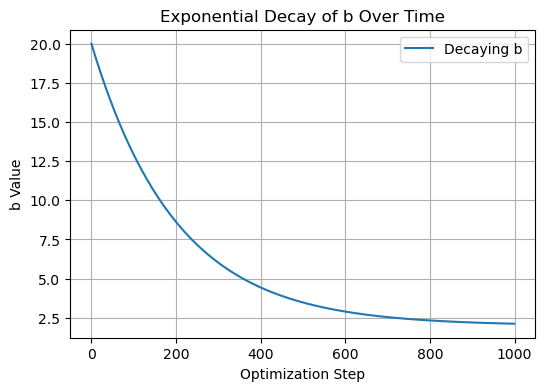

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define decay function
def decay_b(initial_b=20, final_b=2, total_steps=1000, decay_rate=0.005):
    steps = np.arange(total_steps)
    b_values = final_b + (initial_b - final_b) * np.exp(-decay_rate * steps)
    return steps, b_values

# Generate values
steps, b_values = decay_b()

# Plot
plt.figure(figsize=(6, 4))
plt.plot(steps, b_values, label="Decaying b")
plt.xlabel("Optimization Step")
plt.ylabel("b Value")
plt.title("Exponential Decay of b Over Time")
plt.legend()
plt.grid(True)
plt.show()
